In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import glob
%matplotlib inline

In [2]:
def getMCSprofiles(filename):
    '''Function to select specific text data from the MCS orbiter and convert it into an array
    Input:
    filename = the location of the file
    Output:
    x: data converted to data frames'''
    # The header contains column names and description
    header_string = ' ### Retrieved profiles:'
    header_lines = 4
    # Open the file for reading
    f = open(filename)
    lines = f.readlines()
    # Strip newline character from each line
    lines = [line.replace("\n","") for line in lines]
    # Read through all lines to find header string
    nlines = len(lines)
    i = 0
    for line in lines:
        i += 1
        if re.match(header_string, line):
            idx = i + header_lines-1
    # Extract only the lines containing profile data
    data = lines[idx:nlines-1]
    # Convert to floats
    nrows = len(data)-1
    y = np.array(data[0].split(), dtype=np.float)
    ncols = len(y)
    x = np.array([])
    for j in np.arange(0,nrows):
        x = np.append(x, np.array(data[j].split(), dtype=np.float))
    x = np.reshape(x, [nrows,ncols])
    columns = ['Pressure', 'Temperature', 'Temp_Err',
        'Dust Column','Dust_Err', 'H2Oice','H2Oice_Err', 'H2Ovap', 'H2Ovap_Err', 'CO2ice', 'CO2ice_Err', 'Altitude', 'Latitude', 'Longitude'  ]
    values = x
    df = pd.DataFrame(x,columns=columns)
    return df

In [3]:
def getMCSdata(filename, data_string):
    '''Function to select specific text data from the MCS orbiter and convert it into an array
    Input:
    filename = the location of the file
    data_string = specific data to be looked at
    Output:
    x: data converted to floats'''
    # The header contains column names and description
    header_string = ' ### Header data:'
    header_lines = 1
    foot_string = ' ### RMS data:'
    # Open the file for reading
    f = open(filename)
    lines = f.readlines()
    # Strip newline character from each line
    lines = [line.replace("\n","") for line in lines]
    foot_lines = lines.index(foot_string)
    nlines = len(lines)
    i = 0
    # Restrict the text to only the data needed
    for line in lines:
        i += 1
        if re.match(header_string, line):
            idx = i + header_lines - 1 
        if re.match(foot_string, line):
            idy = foot_lines - nlines
    #store data into a list
    data = lines[idx:idy]
    #get rid of leading whitespaces
    x =[]
    for i in data:
        x.append(i.lstrip())
    #get rid of trailing whitespaces
    y = []
    for i in x:
        y.append(i.rstrip())
    #split the data into two columns
    z =[]
    for i in y:
        z.append(i.split('='))
    #convert data to arrays
    col1 = np.array(z)
    #create column of strings
    a = col1[:,0]
    #convert array to list
    b = a.tolist()
    #strip column of strings of whitespaces
    c=[]
    for i in b:
        c.append(i.strip())
    #index for the matching data_string
    colindex = c.index(data_string)
    #create column of floats
    d = col1[:,1]
    #convert array to list
    e = d.tolist()
    #convert list of strings to floats
    f = [float(i) for i in e]
    #find the float matching data_string index
    result = f[colindex]
    return result

In [4]:
def getAllMCSdata(data_string):
    '''Function that uses the getMCSdata function to retrieve specific data from multiple data files
    Input:
    data_string = specific data to be looked at
    Output:
    x: a list of data converted to floats corresponding to the data files '''
    path = 'mcs_ret_v*.out'
    files = sorted(glob.glob(path))
    x = []
    for filename in files:
        x.append(getMCSdata(filename, data_string))
    return x    

In [5]:
def getAllMCSprofiles():
    path = 'mcs_ret_v*.out'
    files = sorted(glob.glob(path))
    x = []
    for filename in files:
        x.append(getMCSprofiles(filename))
    return x  

In [6]:
def getMCSSum(parameter):
    DFlist = getAllMCSprofiles()
    x = []
    for i in range(len(DFlist)):
         x.append(getAllMCSprofiles()[i][parameter])
    x = np.array(x)
    y = []
    for j in x:
        y.append(sum(j[j != -9999.000]))
    return y

In [7]:
x = (getMCSSum('H2Oice'))
x

[0.0016074236797999999, 0.013992161339999998]

In [8]:
t0=time.time()
ayou = getAllMCSdata('Scene latitude')
t1=time.time()
print t1-t0
print ayou

0.00750398635864
[-43.65819, 49.36741]


In [9]:
t0=time.time()
a = getMCSdata('mcs_ret_v4.3.11.00001.out','H2Oice_843_nad_od')
t1=time.time()
print t1-t0
print a

0.00366187095642
0.0034


In [10]:
t0=time.time()
DF = getMCSprofiles('mcs_ret_v4.3.11.00001.out')
t1=time.time()
print t1-t0
print DF

0.00544309616089
        Pressure  Temperature  Temp_Err   Dust Column     Dust_Err  \
0    1878.932000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
1    1658.152000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
2    1463.314000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
3    1291.370000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
4    1139.630000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
5    1005.720000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
6     887.544800    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
7     783.255500    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
8     691.220500    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
9     610.000000    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
10    538.323100    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
11    475.068500    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
12    419.246500    -9999.000 -9999.000 -9.999000e+03 -9999.000000   
13 

In [11]:
useful = DF.loc[13:91]

In [12]:
t = np.array(useful['Temperature'])
a = np.array(useful['Altitude'])
p = np.array(useful['Pressure'])

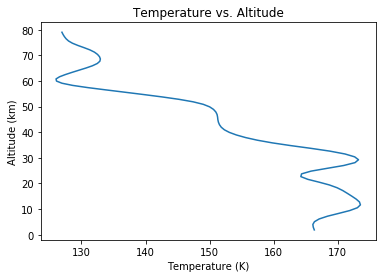

In [13]:
plt.plot(t, a)
plt.title('Temperature vs. Altitude')
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (km)')
plt.show()

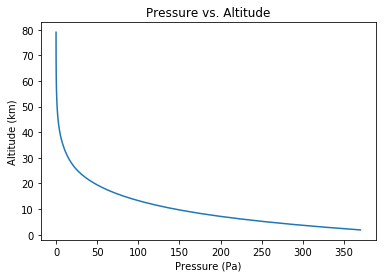

In [14]:
plt.plot(p, a)
plt.title('Pressure vs. Altitude')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Altitude (km)')
plt.show()